# Section 6

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16,
    'text.latex.preamble': r"\usepackage{amsmath}"
})

In [2]:
import irbasis3

## Generate IR basis by singular value expansion

In [3]:
# Create kenerl for lambda_ = 100 and beta = 10
# The default value of eps ``cutoff for singular values" is
# set to 2.2e-16.
# In this sample, we compute fewer basis functions.
lambda_ = 100
beta = 10
wmax = lambda_/beta
K = irbasis3.KernelFFlat(lambda_=100)
basis = irbasis3.FiniteTempBasis(
    K, statistics='F', beta=beta, eps=1e-10)

## Singular values

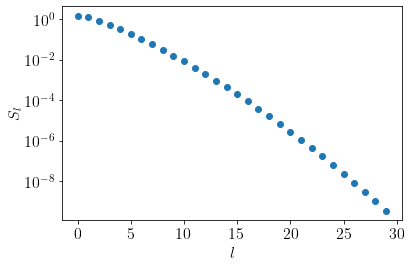

In [4]:
plt.semilogy(basis.s, marker='o', ls='')
plt.xlabel(r'$l$')
plt.ylabel(r'$S_l$')
plt.tight_layout()
plt.savefig('ir_basis_svals.pdf', transparent=True)

## $U_l(\tau)$ and $V_l(\omega)$

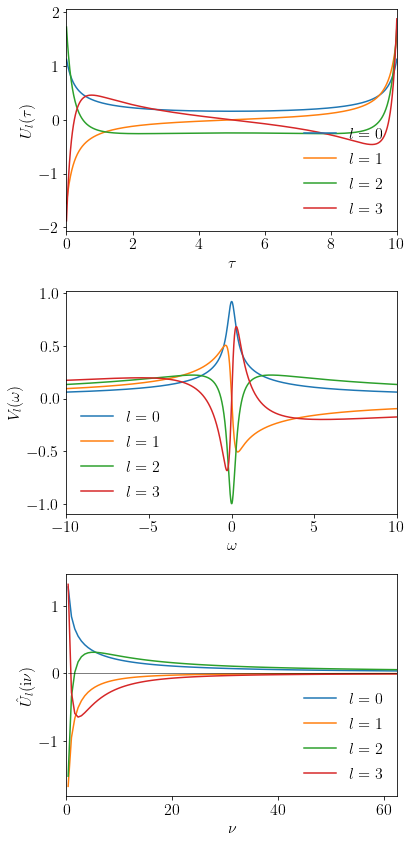

In [5]:
fig = plt.figure(figsize=(6,12))
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)
axes = [ax1, ax2, ax3]

taus = np.linspace(0, beta, 1000)
omegas = np.linspace(-wmax, wmax, 1000)

beta = 10
nmax = 100

v = 2*np.arange(nmax)+1
iv = 1J * (2*np.arange(nmax)+1) * np.pi/beta

uhat_val = basis.uhat(v)
for l in range(4):
    ax1.plot(taus, basis.u[l](taus), label=f'$l={l}$')
    ax2.plot(omegas, basis.v[l](omegas), label=f'$l={l}$')
    y = uhat_val[l,:].imag if l%2 == 0 else uhat_val[l,:].real
    ax3.plot(iv.imag, y, label=f'$l={l}$')

ax1.set_xlabel(r'$\tau$')
ax2.set_xlabel(r'$\omega$')
ax1.set_ylabel(r'$U_l(\tau)$')
ax2.set_ylabel(r'$V_l(\omega)$')
ax1.set_xlim([0,beta])
ax2.set_xlim([-wmax, wmax])

ax3.plot(iv.imag, np.zeros_like(iv.imag), ls='-', lw=0.5, color='k')

ax3.set_xlabel(r'$\nu$')
ax3.set_ylabel(r'$\hat{U}_l(\mathrm{i}\nu)$')
ax3.set_xlim([0, iv.imag.max()])

for ax in axes:
    ax.legend(loc='best', frameon=False)

plt.tight_layout()
plt.savefig('ir_basis_functions.pdf', transparent=True)

In [6]:
# Check orthogonality condition
for i in range(basis.size):
    for j in range(i, basis.size):
        print(i, j, basis.u[i].overlap(basis.u[j]))

0 0 0.9999999999999998
0 1 3.604972223514302e-18
0 2 2.4740138323403604e-17
0 3 2.531612072753653e-17
0 4 -2.331712297201638e-17
0 5 2.5682038960750386e-17
0 6 -2.1650162131819917e-17
0 7 4.228388472693467e-18
0 8 2.1419769170166747e-17
0 9 5.014435047745458e-19
0 10 2.7294789692322574e-17
0 11 -1.7658942884357653e-17
0 12 -4.1118367391512756e-17
0 13 -5.0550926292136644e-18
0 14 -2.3107058801097313e-17
0 15 -1.2685165418080402e-17
0 16 -2.907017074976759e-17
0 17 -2.5234805564600116e-17
0 18 -1.1519648082658485e-17
0 19 -1.8512752095189988e-17
0 20 -4.24465150528075e-17
0 21 -7.128629284092192e-18
0 22 -3.979021973021801e-17
0 23 -3.144186300207963e-18
0 24 -2.0843786766033823e-17
0 25 1.235990476633475e-17
0 26 2.179246366695864e-17
0 27 -1.7401444868392346e-17
0 28 -6.055269133331542e-17
0 29 -6.467265958876034e-17
1 1 0.9999999999999999
1 2 3.686287386450715e-18
1 3 -5.55653613398821e-19
1 4 3.881443777498106e-17
1 5 6.830473686658678e-18
1 6 1.9081958235744878e-17
1 7 -1.280713816